<a href="https://colab.research.google.com/github/harish-03-11/Bank-churn-customers-with-sampling/blob/main/Har_Bank_Customer_Churn_with_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given: Bank customers dataset


Handling imbalanced datasets with sampling methods

Building a classifier which can determine whether they will leave in the next 6 months or not

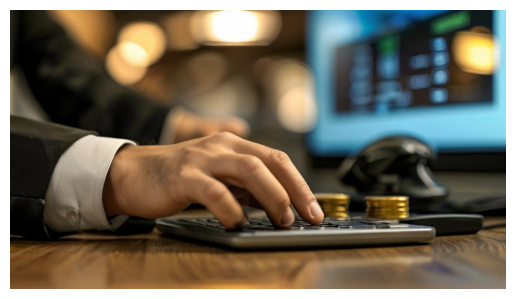

In [18]:
# just for a visualization of a bank
import cv2
from matplotlib import pyplot as plt


image_path = '/content/sample_data/gem-images/image.png'


image = cv2.imread(image_path)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
df = pd.read_csv("/content/sample_data/archive.zip")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
#checking what are the unique values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [22]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [23]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [24]:
df.replace({'Female': 1, "Male": 0},inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [25]:
df.drop(["CustomerId","RowNumber",'Surname','Geography'], axis = 1,inplace=True)

In [26]:
df1 = df

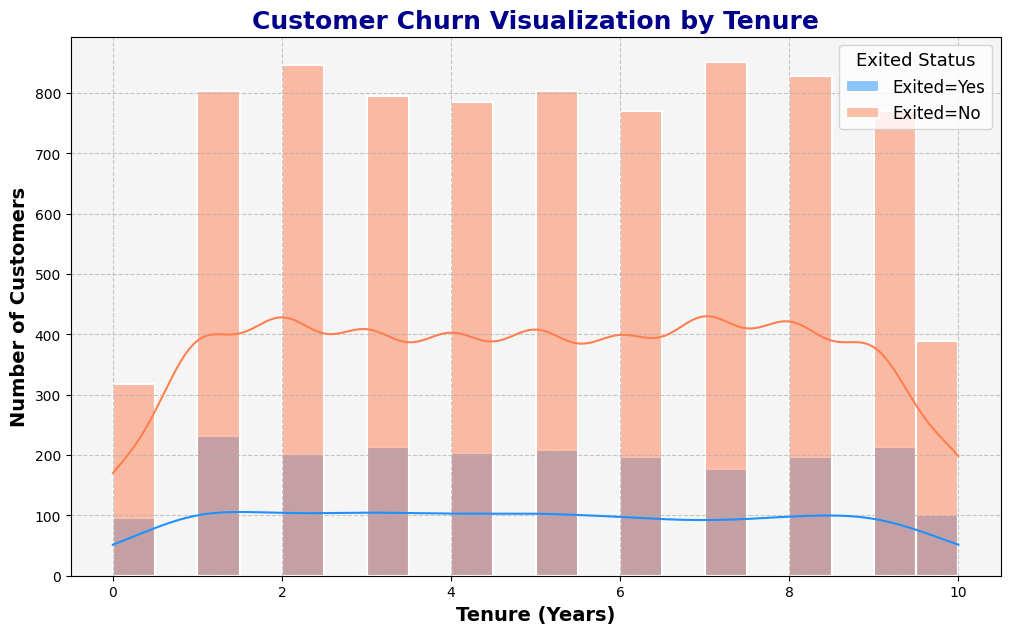

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


exited_no = df1[df1.Exited == 0].Tenure
exited_yes = df1[df1.Exited == 1].Tenure


plt.figure(figsize=(12, 7))
sns.histplot(exited_yes, color="dodgerblue", kde=True, label="Exited=Yes", bins=20, edgecolor="white", linewidth=1.5)
sns.histplot(exited_no, color="coral", kde=True, label="Exited=No", bins=20, edgecolor="white", linewidth=1.5)


plt.xlabel("Tenure (Years)", fontsize=14, fontweight='bold')
plt.ylabel("Number of Customers", fontsize=14, fontweight='bold')
plt.title("Customer Churn Visualization by Tenure", fontsize=18, fontweight='bold', color='darkblue')
plt.legend(title="Exited Status", title_fontsize='13', fontsize='12')


plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')


plt.show()


In [28]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [29]:
df1.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0


In [30]:
cols_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary','NumOfProducts','Age','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [31]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
5,0.590,0,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0
7,0.052,1,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0
9,0.668,0,0.121622,0.2,0.536488,0.000000,1,1,0.358605,0


In [32]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [33]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [35]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [36]:
import tensorflow as tf
from tensorflow import keras


In [37]:
df1.shape

(10000, 10)

In [38]:
df1.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.0,0.0,1,1,0.506735,1


In [39]:
X = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df1['Exited']

In [40]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=5)

In [41]:
model = keras.Sequential([

              keras.layers.Dense(8, input_shape = (9,),activation="relu"),
              keras.layers.Dense(1,activation="sigmoid")

])

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train1,y_train1,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6413 - loss: 0.6276
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8034 - loss: 0.4876
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4731
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7939 - loss: 0.4731
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: 0.4618
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7955 - loss: 0.4600
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4416
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4362
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4465
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8069 - loss: 0.4343
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8084 - loss: 0.4355
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [42]:
model.evaluate(X_test1,y_test1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3683


[0.3659105896949768, 0.8460000157356262]

In [43]:

yp = model.predict(X_test1)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02836248],
       [0.08129799],
       [0.11379491],
       [0.10498022],
       [0.07643946]], dtype=float32)

In [44]:

y_test1[:5]


,Exited
7054,0
442,0
3954,0
2288,0
3196,0


In [45]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [46]:

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification for Unbalanced data set")
print("")
print(classification_report(y_test1,y_pred))

Classification for Unbalanced data set

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.72      0.39      0.51       405

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

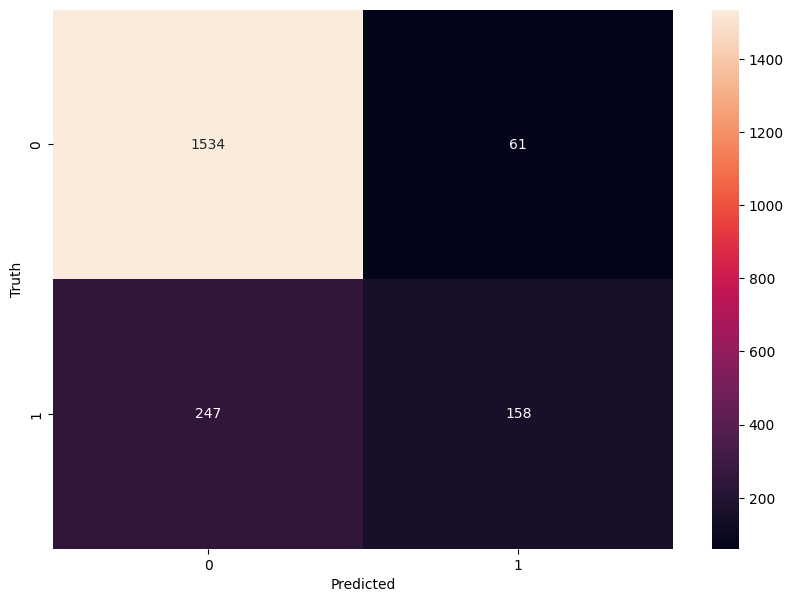

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test1,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [49]:
#Accuracy

In [50]:
round((1554+121)/(1554+121+41+282),2)

0.84

How to handle imbalanced data sets

In [51]:
len(X_train1.value_counts())

8000

In [52]:
y_train1.value_counts()

,count
Exited,
0,6368
1,1632


UNDERSAMPLED METHOD

In [53]:
y_test1.value_counts()

,count
Exited,
0,1595
1,405


In [54]:
from sklearn.utils import resample


In [55]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [56]:
df_majority = df[df1['Exited']==0]
df_minority = df[df1['Exited']==1]

df_downsampled = resample(df_majority ,replace=False,n_samples = len(df_minority),random_state =42)

In [57]:
df_downsampled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0
1618,0.694,0,0.121622,0.8,0.562873,0.333333,1,0,0.452941,0
1633,0.424,0,0.229730,0.7,0.000000,0.000000,0,0,0.244314,0
...,...,...,...,...,...,...,...,...,...,...
9918,0.604,0,0.175676,0.1,0.529548,0.000000,0,0,0.790290,0
7710,0.312,1,0.297297,0.3,0.000000,0.000000,1,1,0.721739,0
5156,0.410,0,0.202703,0.5,0.507550,0.000000,0,1,0.608947,0
3104,0.352,0,0.175676,0.5,0.580065,0.000000,1,0,0.662029,0


In [58]:
df_new = pd.concat([df_downsampled,df_minority],axis=0)

In [59]:
df_new.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0
1618,0.694,0,0.121622,0.8,0.562873,0.333333,1,0,0.452941,0
1633,0.424,0,0.229730,0.7,0.000000,0.000000,0,0,0.244314,0


In [60]:
features = df_downsampled[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
target = df_downsampled['Exited']

In [61]:
features.value_counts()

CreditScore  Gender  Age       Tenure  Balance   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
0.122        0       0.148649  0.0     0.237934  0.333333       1          1               0.267384           1
0.690        0       0.418919  0.9     0.635551  0.000000       1          0               0.679214           1
0.692        1       0.121622  0.2     0.383141  0.333333       1          1               0.029863           1
                     0.094595  0.8     0.503960  0.000000       1          0               0.609523           1
             0       0.567568  0.8     0.353876  0.000000       1          1               0.984328           1
                                                                                                             ..
0.522        1       0.148649  0.4     0.314414  0.333333       1          1               0.134593           1
                     0.108108  0.2     0.428496  0.333333       1          1               0.604008           1
             0       0.675676  0.5     0.329007  0.333333       1          1               0.732252           1
                     0.270270  0.4     0.283058  0.333333       1          0               0.012165           1
1.000        1       0.337838  0.8     0.367659  0.333333       1          0               0.274717           1
Name: count, Length: 2037, dtype: int64

In [62]:
target.value_counts()

,count
Exited,
0,2037


In [63]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(features,target,test_size=0.20,random_state=42, stratify=target)

In [64]:
X_train2.shape

(1629, 9)

In [65]:
y_train2.shape

(1629,)

In [66]:
y_test2.value_counts()



,count
Exited,
0,408


In [67]:
df_new.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0


In [68]:
model_new = keras.Sequential([
    keras.layers.Dense(8, input_dim=9, activation = 'relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')


])

model_new.compile(

    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_new.fit(X_train2,y_train2,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.5496
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3168
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0946
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0275
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0126
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0061
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.4590e-04
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7980e-04
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.4053e-04
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [69]:
model.evaluate(X_test2,y_test2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.1611 


[0.16501817107200623, 0.9754902124404907]

In [70]:
print("Shape of X_train2:", X_train2.shape)
print("Shape of y_train2:", y_train2.shape)


Shape of X_train2: (1629, 9)
Shape of y_train2: (1629,)


In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
yp_new = model_new.predict(X_test2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [73]:
y_new_pred = [] # make sure this list is initialized
for element in yp_new:
  if element > 0.5:
    y_new_pred.append(1) # append to the correct list
  else:
    y_new_pred.append(0)

In [74]:
confusion_matrix(y_test2,y_new_pred)

array([[408]])

In [75]:
print("Under sampled method : Classification report")
print('')
print(classification_report(y_test2,y_new_pred))

Under sampled method : Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



Text(95.72222222222221, 0.5, 'Truth')

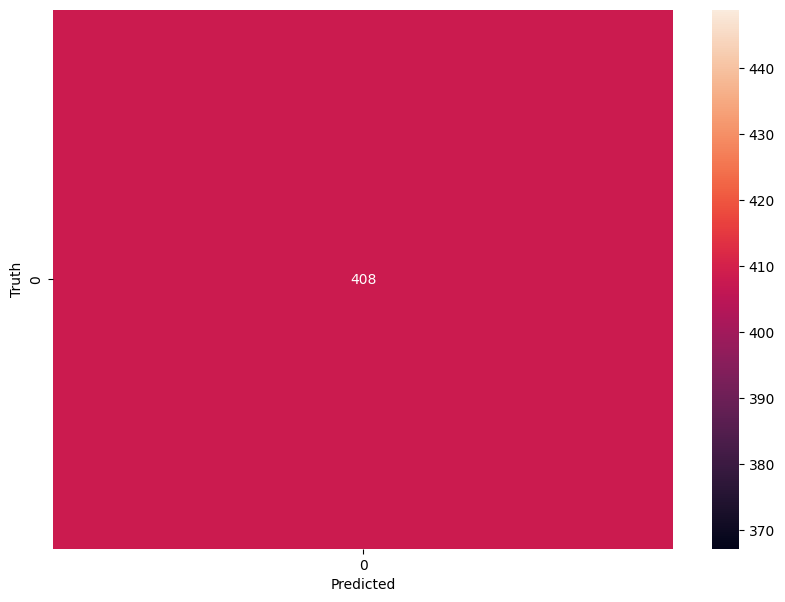

In [76]:
import seaborn as sn
cmm = tf.math.confusion_matrix(labels=y_test2,predictions=y_new_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cmm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Over sampling method

In [77]:
df_new.head(2

            )

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0


In [78]:
df_majority_oversampling = df[df1['Exited']==0]
df_minority_oversampling = df[df1['Exited']==1]

In [79]:
df_majority_oversampling.shape

(7963, 10)

In [80]:
df_minority_oversampling.shape

(2037, 10)

In [81]:
df_minority_upsampled = resample(df_minority_oversampling,replace = True, n_samples = len(df_majority_oversampling),random_state=42)

In [82]:
df_oversampled = pd.concat([df_majority_oversampling, df_minority_upsampled],axis=0)

In [83]:
df_oversampled.shape

(15926, 10)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
oversample_x = df_oversampled[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
oversample_y = df_oversampled['Exited']

In [86]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(oversample_x,oversample_y,test_size=0.2,stratify=oversample_y,random_state=42)

In [87]:
model_oversample = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_oversample.compile (
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_oversample.fit(X_train3,y_train3,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5847 - loss: 0.6737
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6385 - loss: 0.6335
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6701 - loss: 0.6097
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6968 - loss: 0.5846
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7076 - loss: 0.5637
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 0.5443
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7383 - loss: 0.5319
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7407 - loss: 0.5223
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7461 - loss: 0.5127
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7479 - loss: 0.5077
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7465 - loss: 0.5136
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [88]:
yp_oversample = model_oversample.predict(X_test3)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [89]:
y_pred_oversample = []
for element in yp_oversample:
  if element > 0.5:
    y_pred_oversample.append(1)
  else:
    y_pred_oversample.append(0)

In [90]:
print("Classification report for over sampling ")
print("")
print(classification_report(y_test3,y_pred_oversample))

Classification report for over sampling 

              precision    recall  f1-score   support

           0       0.79      0.75      0.76      1593
           1       0.76      0.80      0.78      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



In [91]:
print(confusion_matrix(y_test3,y_pred_oversample))

[[1187  406]
 [ 325 1268]]


Text(95.72222222222221, 0.5, 'Truth')

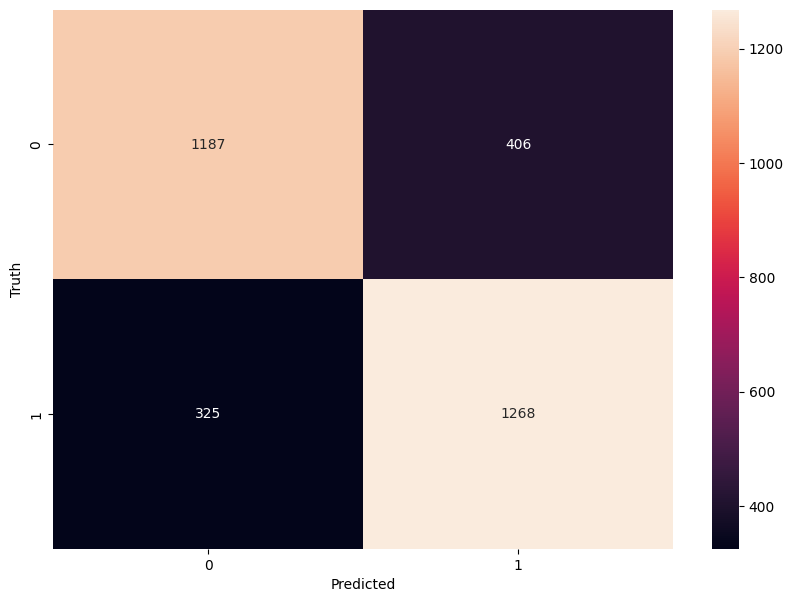

In [92]:
import seaborn as sn
cm_oversample = tf.math.confusion_matrix(labels=y_test3,predictions=y_pred_oversample)

plt.figure(figsize = (10,7))
sn.heatmap(cm_oversample, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Trying with Smote

In [93]:
sm_features = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
sm_target = df1['Exited']

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')

In [95]:
df_majority_sm = df[df1['Exited']==0]
df_minority_sm = df[df1['Exited']==1]

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')

In [97]:
x_sm, y_sm = smote.fit_resample(sm_features,sm_target)

In [98]:
y_sm.value_counts()

,count
Exited,
1,7963
0,7963


In [99]:
sm_target.value_counts(

)

,count
Exited,
0,7963
1,2037


In [100]:
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4 = train_test_split(x_sm,y_sm,test_size =0.20,random_state=42,stratify = y_sm)

In [101]:
model_smote = keras.Sequential([
    keras.layers.Dense(8, input_dim=9, activation = 'relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')


])

model_smote.compile(

    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_smote.fit(X_train4,y_train4,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5317 - loss: 0.6902
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6084 - loss: 0.6723
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6542 - loss: 0.6231
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7018 - loss: 0.5766
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 0.5456
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7445 - loss: 0.5238
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7501 - loss: 0.5147
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 0.5202
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7472 - loss: 0.5093
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7501 - loss: 0.5036
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7520 - loss: 0.5026
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [102]:
model_smote.evaluate(X_test4,y_test4
                     )

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.4560


[0.4546164870262146, 0.771500289440155]

In [103]:
yp_smote = model_smote.predict(X_test4)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [104]:
y_pred_smote = []
for element in yp_smote:
  if element > 0.5:
    y_pred_smote.append(1)
  else:
    y_pred_smote.append(0)

In [105]:
print("Classificaiton report for SMOTE OVER SAMPLE METHOD")
print("")
print(classification_report(y_test4,y_pred_smote))

Classificaiton report for SMOTE OVER SAMPLE METHOD

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1593
           1       0.77      0.77      0.77      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



Text(95.72222222222221, 0.5, 'Truth')

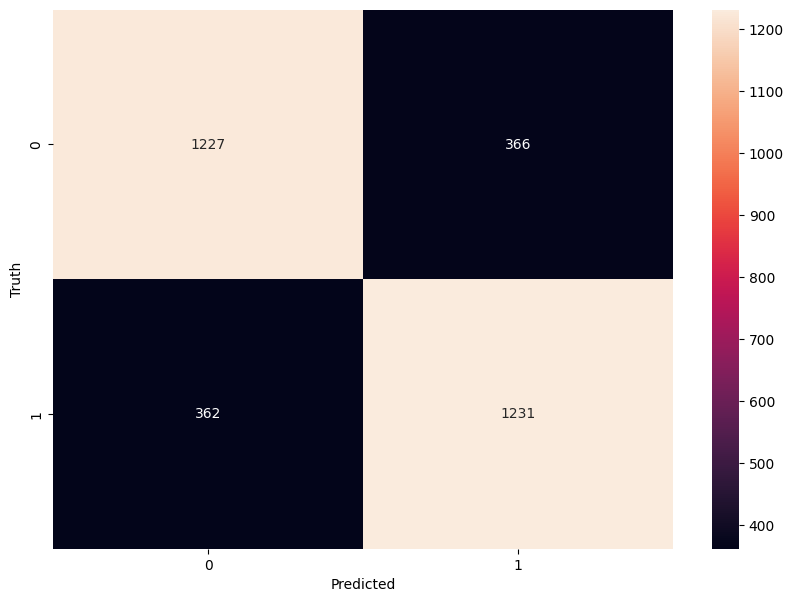

In [106]:
import seaborn as sn
cm_smote = tf.math.confusion_matrix(labels=y_test4,predictions=y_pred_smote)

plt.figure(figsize = (10,7))
sn.heatmap(cm_smote, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble methods

ENSEMBLE PART 1

In [107]:
target_0_major = df[df1['Exited']==0]
target_1_minor = df[df1['Exited']==1]

In [108]:
df_combine_ensemble = pd.concat([target_0_major[:2037],target_1_minor],axis=0)
ensemble_x = df_combine_ensemble[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_y = df_combine_ensemble['Exited']


In [109]:
ensemble_y.value_counts()

,count
Exited,
0,2037
1,2037


In [110]:
target_0_major.Exited.value_counts(
)

,count
Exited,
0,7963


In [111]:
print(target_1_minor.Exited.value_counts)


<bound method IndexOpsMixin.value_counts of 0       1
2       1
5       1
7       1
16      1
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 2037, dtype: int64>


In [112]:
df_combine_ensemble.value_counts

<bound method DataFrame.value_counts of       CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
1           0.516       1  0.310811     0.1  0.334031       0.000000   
3           0.698       1  0.283784     0.1  0.000000       0.333333   
4           1.000       1  0.337838     0.2  0.500246       0.000000   
6           0.944       0  0.432432     0.7  0.000000       0.333333   
8           0.302       0  0.351351     0.4  0.566170       0.333333   
...           ...     ...       ...     ...       ...            ...   
9981        0.296       0  0.324324     0.3  0.605982       0.000000   
9982        0.610       1  0.378378     0.7  0.546617       0.000000   
9991        0.494       1  0.472973     0.4  0.352259       0.000000   
9997        0.718       1  0.243243     0.7  0.000000       0.000000   
9998        0.844       0  0.324324     0.3  0.299226       0.333333   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1             0               1         0.562709       0  
3             0               0         0.469120       0  
4             1               1         0.395400       0  
6             1               1         0.050261       0  
8             0               1         0.374680       0  
...         ...             ...              ...     ...  
9981          1               1         0.267193       1  
9982          1               0         0.575729       1  
9991          1               0         0.346899       1  
9997          0               1         0.210390       1  
9998          1               0         0.464429       1  

[4074 rows x 10 columns]>

In [113]:
X_train5,X_test5,y_train5,y_test5= train_test_split(ensemble_x,ensemble_y,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [114]:
model_ensemble = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble.fit(X_train5,y_train5,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4973 - loss: 0.7050
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5443 - loss: 0.6865
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 0.6803
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.6674
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6245 - loss: 0.6577
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - loss: 0.6414
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.6346
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - loss: 0.6302
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - loss: 0.6201
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6923 - loss: 0.5947
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7043 - loss: 0.5808
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [115]:
model_ensemble.evaluate(X_test5,y_test5)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4591  


[0.47631368041038513, 0.7607361674308777]

In [116]:
yp_ensemble1 = model_ensemble.predict(X_test5)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [117]:
y_pred_ensemble1 = []
for element in yp_ensemble1:
  if element > 0.5:
    y_pred_ensemble1.append(1)
  else:
    y_pred_ensemble1.append(0)

In [118]:
print("Classification report for ensemble Batch 1")
print("")
print(classification_report(y_test5,y_pred_ensemble1))

Classification report for ensemble Batch 1

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       408
           1       0.77      0.75      0.76       407

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



In [119]:
y_test5.value_counts()

,count
Exited,
0,408
1,407


Text(95.72222222222221, 0.5, 'Truth')

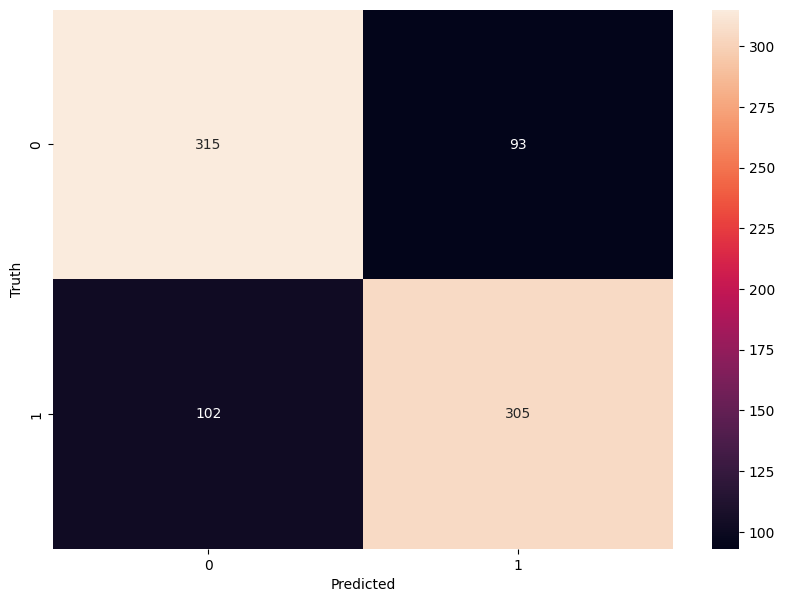

In [120]:
import seaborn as sn
cm_ensemble1 = tf.math.confusion_matrix(labels=y_test5,predictions=y_pred_ensemble1)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble 2

In [121]:
target_0_major2 = df[df1['Exited']==0]
target_1_minor2 = df[df1['Exited']==1]

In [122]:
2037+2037
4074+2037

6111

In [123]:
df_combine_ensemble2 = pd.concat([target_0_major2[2037:4074],target_1_minor2],axis=0)
ensemble2_x = df_combine_ensemble2[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble2_y = df_combine_ensemble2['Exited']

In [124]:
X_train6,X_test6,y_train6,y_test6= train_test_split(ensemble2_x,ensemble2_y,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [125]:
2654+2654

5308

In [126]:
model_ensemble2 = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble2.fit(X_train6,y_train6,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4909 - loss: 0.7171
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5577 - loss: 0.6859
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.6637
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.6451
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - loss: 0.6228
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6188
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.6007
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - loss: 0.6070
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.5985
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.5982
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - loss: 0.5944
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [127]:
model_ensemble2.evaluate(X_test6,y_test6)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.4594  


[0.46827152371406555, 0.7680981755256653]

In [128]:
yp_ensemble2 = model_ensemble2.predict(X_test6)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [129]:
y_pred_ensemble2 = []
for element in yp_ensemble2:
  if element > 0.5:
    y_pred_ensemble2.append(1)
  else:
    y_pred_ensemble2.append(0)

In [130]:
print("Classification report Ensemble batch 2")
print("")
print(classification_report(y_test6,y_pred_ensemble2))

Classification report Ensemble batch 2

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       408
           1       0.78      0.74      0.76       407

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



Text(95.72222222222221, 0.5, 'Truth')

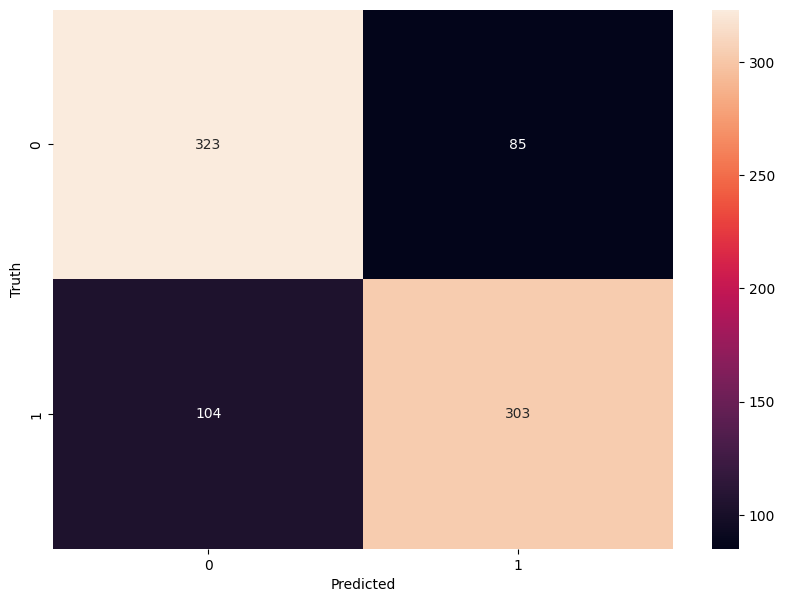

In [131]:
import seaborn as sn
cm_ensemble2 = tf.math.confusion_matrix(labels=y_test6,predictions=y_pred_ensemble2)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble batch 3

In [132]:
target_0_major3 = df[df1['Exited']==0]
target_1_minor3 = df[df1['Exited']==1]

In [133]:
7963-5308

2655

In [134]:
df_combine_ensemble3 = pd.concat([target_0_major3[4074:6111],target_1_minor3],axis=0)
ensemble_x3= df_combine_ensemble3[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_y3 = df_combine_ensemble3['Exited']


In [135]:
X_train7,X_test7,y_train7,y_test7= train_test_split(ensemble_x3,ensemble_y3,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [136]:
df_combine_ensemble3.Exited.value_counts()

,count
Exited,
0,2037
1,2037


In [137]:
model_ensemble3 = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble3.fit(X_train7,y_train7,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4868 - loss: 0.6932
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5776 - loss: 0.6812
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6092 - loss: 0.6743
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6358 - loss: 0.6595
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - loss: 0.6460
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.6424
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.6205
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - loss: 0.6211
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 0.5949
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - loss: 0.5943
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6980 - loss: 0.5823
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [138]:
model.evaluate(X_test7,y_test7)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6768 - loss: 0.6108 


[0.5909191966056824, 0.6932515501976013]

In [139]:
yp_ensemble3 = model_ensemble3.predict(X_test7)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [140]:
y_pred_ensemble3 = []
for element in yp_ensemble3:
  if element > 0.5:
    y_pred_ensemble3.append(1)
  else:
    y_pred_ensemble3.append(0)

In [141]:
print("classification report ensemble batch 3")
print("")
print(classification_report(y_test7,y_pred_ensemble3))

classification report ensemble batch 3

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       408
           1       0.76      0.71      0.74       407

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



Text(95.72222222222221, 0.5, 'Truth')

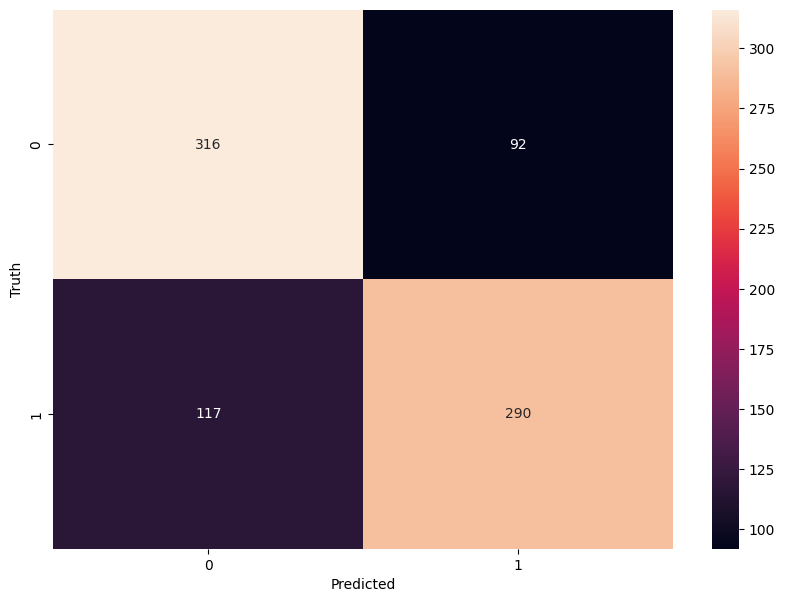

In [142]:
import seaborn as sn
cm_ensemble3 = tf.math.confusion_matrix(labels=y_test7,predictions=y_pred_ensemble3)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [143]:
len(y_pred_ensemble1)

815

In [144]:
y_pred_final = y_pred_ensemble1.copy()
for i in range(len(y_pred_ensemble1)):
    n_ones = y_pred_ensemble1[i] + y_pred_ensemble2[i] + y_pred_ensemble3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [145]:
print("Ensemble method final report ")
print("")
cl_rep = classification_report(y_test7, y_pred_final)
print(cl_rep)

Ensemble method final report 

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       408
           1       0.85      0.75      0.80       407

    accuracy                           0.81       815
   macro avg       0.81      0.81      0.81       815
weighted avg       0.81      0.81      0.81       815



In [146]:
print("")

In [147]:
print("")

In [148]:
print("")